<a href="https://colab.research.google.com/github/sasi6996/EAI6000/blob/master/Final_Project_Development_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sasank Kumar Kantana

# **Final Project** - Development Report

## ***Stock Prices Prediction Using Machine Learning and Deep Learning Techniques.***


### Table of Contents:
* Understand the Problem
* Data Primary analysis
* Model Selection


1.   Linear Regression Model after finding Moving Average
2.   K-Naerest neighbours model (Two simple basic models)

* Prediction by the Recurrent Neural Networks with:


1.   Long Short Term Memory (LSTM)
2.   Auto ARIMA
3.   Prophet





# **1.Understanding the problem**

* Before getting into the implementation part of the project, let us first brief you regrading understanding and evaluation of  what exactly we want to achieve through this process.
* Broadly detailing, we understood that stock market analysis is divided into two parts. They are as follows:
           

1.   Fundamental Analysis
2.   Technical Analysis.

* ***Fundamental Analysis*** involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.
* **Technical Analysis**, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.
* We are mainly focusing on the technical analysis as it derives the required interpretations that will be based on pertaining solutions with selected models.



# 2.Data Primary Aanalysis

Code for downloading the dataset to google drive and load directly to the notebook:

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import requests  

file_url = "https://www.quandl.com/api/v3/datasets/NSE/TATAGLOBAL.csv?api_key=no1QrXthvAm9S9sgdDrQ"

r = requests.get(file_url, stream = True)  

with open("/content/gdrive/My Drive/NSETATAGLOBAL.csv", "wb") as file:  

    for block in r.iter_content(chunk_size = 1024): 

         if block:  

             file.write(block)
with open("/content/gdrive/My Drive/NSETATAGLOBAL.csv", "rb") as f:
  df=pd.read_csv(f)    
  df.head()  
print(df.head())

         Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0  2019-01-04  210.60  214.90  ...  213.80             1213181.0          2583.05
1  2019-01-03  214.95  215.35  ...  210.05             2096553.0          4433.50
2  2019-01-02  219.00  220.35  ...  214.60             1081778.0          2340.31
3  2019-01-01  219.95  221.05  ...  219.10              716275.0          1571.63
4  2018-12-31  222.00  223.65  ...  219.40              965858.0          2131.09

[5 rows x 8 columns]


If we observe the data there are multiple variables present in it - date, open, high, low, last, close, total_trade_quantity, and turnover.
* In this data the columns, **Open** and **Close** represents the **initial** and **final** price at which the stock is traded on a particular day.
* **High, Low** and **Last** represent the **maximum, minimum**, and **last** price of the share for the day.
* Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.



Another important thing to note is that the market is closed on weekends and public holidays.On noticing the abaove table, we can identify that some date values are missing – 2/10/2018, 6/10/2018, 7/10/2018. Of these dates, 2nd is a national holiday while 6th and 7th fall on a weekend. These are the important aspects which we need to take into account for the further analysis

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


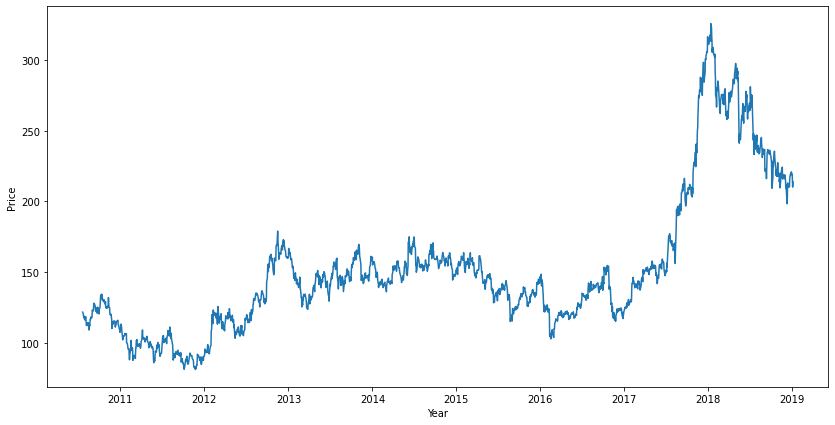

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plotting the figure
plt.figure(figsize=(14,7))
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(df['Close'], label='Close Price history')

# 3.Model Selection (Primary Moving Average Calculation)

* ‘Average’ is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s temperature – these all are routine tasks we do on a regular basis. So this is a good starting point to use on our dataset for making predictions.
* We will implement this technique on our dataset. The first step is to create a dataframe that contains only the Date and Close price columns, then split it into train and validation sets to verify our predictions.

In [4]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(987, 2)

 Shape of validation set:
(1113, 2)

 RMSE value on validation set:
1498.4590176373497


* Just checking the RMSE does not help us in understanding how the model performed. So we ant to visualize this to get a more brief understanding. So here is a plot of the predicted values along with the actual values.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


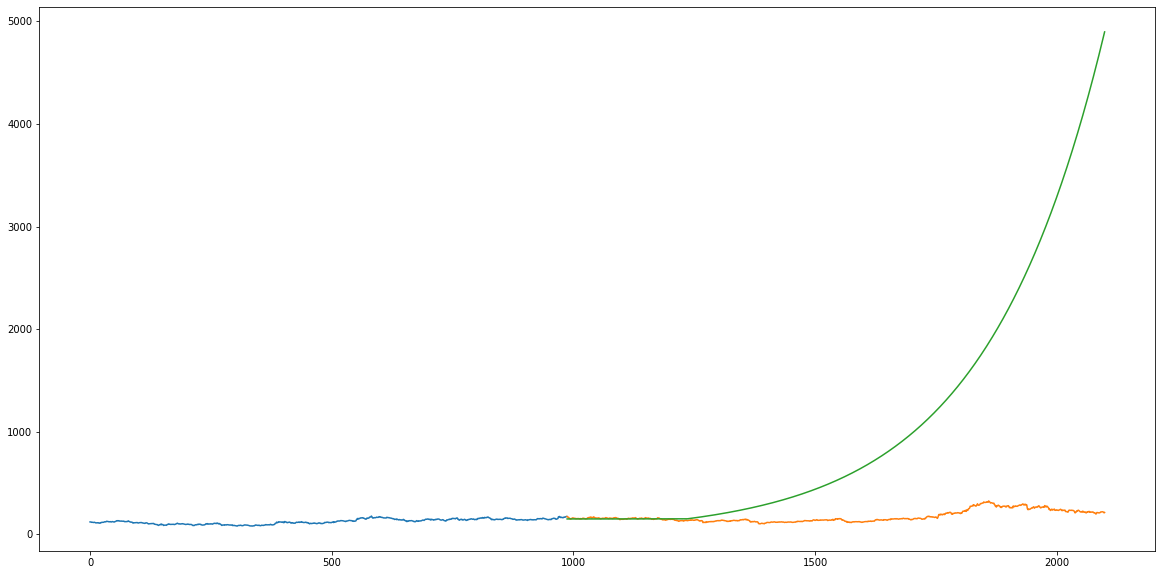

In [5]:
#plotting the graph
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

* Till here we have developed our analysis futher we have get the inference by checking the RMSE value and whether the results are reliable or not. From the plot we guess that the values are not that promising. So, we need to take some further analysis to check them. 
* There after we will start with two common machine learning techniques - **Linear Regression** and **K-N neighbours** to predict the stcok prices.